<h1><center><span style="color:DarkOrange">Amazon Product Reviews - Exploratory Data Analysis</span></h1></center>

## <span style="color:navy"><center> **Project Goals** </span></center>
#### <span style="color:navy">1) Determine which product categories and brands have the highest and lowest ratings.</span>
#### <span style="color:navy">2) Determine if any factors are associated with product ratings.</span>
#### <span style="color:navy">3) Discover products that have high potential for growth (high average ratings, but low rating counts).</span>

## <span style="color:navy"><center> **Project Findings** </center></span>
#### <span style="color:navy">1) In general, products ratings are high across all categories, with the lowest average rating at 3.93. The product categories with the highest ratings are networking devices and computer accessories & peripherals, and the category with the lowest rating is headphones, earbuds, and accessories. Duracell and AmazonBasics (electronic accessories, home & kitchen appliances) have the highest average ratings, while Ambrane (electronic accessories) and Noise (wearable technology) have the lowest.</span>
#### <span style="color:navy">2) There are no discernable correlations between any of the numeric variables and product rating.</span>
#### <span style="color:navy">3) The 10 products listed below have a relatively low number of total ratings (<10,000), but earned ratings of over 4.6 out of 5. Because these products are well loved, but not well known, Amazon could benefit from promoting these products to customers.</span>

### <center><span style="color:DarkOrange">Importing Pandas, NumPy, Seaborn, Matplotlib, and Scipy Libraries </span></center>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

### <center><span style="color:DarkOrange">Loading the CSV file and Taking a Look at the Data</span></center>

In [3]:
products = pd.read_csv("amazon.csv")
products.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [6]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

<h3><center>Observations and Next Steps</center></h3>
<h5>- All columns are the `object` data type. I'll convert the columns that I'll be using in my statistical analysis into a `float` data type so that visualizations can be created and calculations can be performed.</h5>
<h5>- There are characters (currency symbols, commas, and percentages) that need to be removed before a data type change can occur.</h5>
<h5>- The `rating_count` column has two null values that need to be addressed.</h5>

# <center><span style="color:DarkOrange">Cleaning the Data</span></center>

### <center><span style="color:DarkOrange">Changing Data Types and Standardizing Numeric Data</span></center>

In [9]:
# Changing the data type of discounted_price, actual_price, discount_percentage, and rating_count from `object` to `float`
# Standardizing to remove currency symbols, commas, and percentage symbols.

products['discounted_price'] = products['discounted_price'].str.replace('\u20B9', '')
products['discounted_price'] = products['discounted_price'].str.replace(',', '')
products['discounted_price'] = products['discounted_price'].astype('float64')

products['actual_price'] = products['actual_price'].str.replace('\u20B9', '')
products['actual_price'] = products['actual_price'].str.replace(',', '')
products['actual_price'] = products['actual_price'].astype('float64')

products['discount_percentage'] = products['discount_percentage'].str.replace('%', '')
products['discount_percentage'] = products['discount_percentage'].astype('float64')

products['rating_count'] = products['rating_count'].str.replace(',', '')
products['rating_count'] = products['rating_count'].astype('float64')

In [11]:
# Taking a look at the updated columns in the dataframe to make sure that changes were made correctly. Looks good!

products[['discounted_price', 'actual_price', 'discount_percentage', 'rating_count']].head()

,discounted_price,actual_price,discount_percentage,rating_count
0,399.0,1099.0,64.0,24269.0
1,199.0,349.0,43.0,43994.0
2,199.0,1899.0,90.0,7928.0
3,329.0,699.0,53.0,94363.0
4,154.0,399.0,61.0,16905.0


### <center><span style="color:DarkOrange">Addressing Missing Data</span></center>

In [14]:
# Get the product IDs where 'rating_count' is null
null_rating_count_ids = products[products['rating_count'].isnull()]['product_id']

# Display the rating count for rows with matching product_ids
matching_rating_counts = products[products['product_id'].isin(null_rating_count_ids)]['rating_count']

# Show the result
print(matching_rating_counts)

282   NaN
324   NaN
Name: rating_count, dtype: float64


In [16]:
# There are no rows in the dataframe that have these same product IDs and a populated rating count, and current rating counts scraped from Amazon's 
# website cannot be used due to a lack of timestamps in the dataframe. Decided to delete rows where 'rating_count' is null.

products = products.dropna(subset=['rating_count'])

### <center><span style="color:DarkOrange">Finding and Fixing Unusual Values</span></center>

In [18]:
# Finding an unusual value in the 'rating' column, "|".
products['rating'].value_counts()

rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
4.8      3
3.2      2
2.8      2
3.0      2
5.0      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: count, dtype: int64

In [20]:
# Deleting row containing an unusable rating. This individual customer's rating cannot easily be recovered.

products = products[products['rating'] != '|']

In [22]:
# Now that all values are numeric in the 'rating' column, it can be converted into a 'float' data type.

products['rating'] = products['rating'].astype('float64')

### <center><span style="color:DarkOrange">Creating Helpful New Columns</span></center>

In [28]:
# Creating a column for the brand of each item, which is found at the beginning of the product name.

products['brand'] = products['product_name'].str.split(' ').str[0]

In [24]:
# Exploring the category column. There are 211 distinct categories, so these will need to be consolidated.
products['category'].value_counts()

category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                                          231
Electronics|WearableTechnology|SmartWatches                                                                                 76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                                                        68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                                               63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                                                                52
                                                                                                                          ... 
Electronics|Cameras&Photography|Accessories|Batteries&Chargers|BatteryChargers                                               1
Computers&Accessories|NetworkingDevices|DataCards&Dongles                                             

In [26]:
# Consolidating categories by creating a new column that contains the text up to the 2nd "|" in the 'category' column.

products['grouped_category'] = products['category'].str.split('|').str[:2].str.join('|')

In [ ]:
# Placeholder -- maybe create rating categories

# <center><span style="color:DarkOrange">Exploratory Data Analysis and Visualizations</span></center>

In [34]:
# Formatting so that graphs appear within Jupyter Notebook and are an appropriate size.

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 75

### <center><span style="color:DarkOrange">1) Which Product Categories Have the Highest and Lowest Ratings?</span></center>

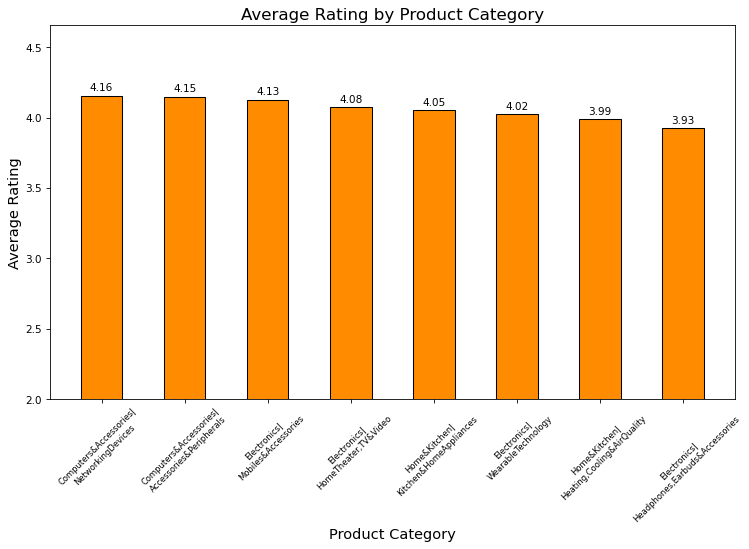

In [36]:
# Creating a bar graph of product categories and their average customer ratings

# Filtering out categories with fewer than 30 rows
category_counts = products['grouped_category'].value_counts()
valid_categories = category_counts[category_counts >= 30].index

# Filtering the DataFrame to include only categories with sufficient data
filtered_products = products[products['grouped_category'].isin(valid_categories)]

# Compute the average rating for each category and sort in descending order
average_ratings = filtered_products.groupby('grouped_category')['rating'].mean()
average_ratings = average_ratings.sort_values(ascending=False)

# Create the bar graph
x_positions = range(len(average_ratings))
bars = plt.bar(x_positions, average_ratings, width=0.5, align='center', color='DarkOrange', edgecolor='black')

# Add labels to the bars
for bar, rating in zip(bars, average_ratings):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center of the bar
        bar.get_height() + 0.02,  # Slightly above the bar
        f'{rating:.2f}',  # Display the rating with 2 decimal points
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Customize the graph
plt.ylim(2.0, average_ratings.max() + 0.5)                    # Set the y-axis to start at 2.0
plt.title('Average Rating by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.tight_layout()

# Customize the xtick labels with wrapped text
wrapped_labels = [
    label.replace('|', '|\n') for label in average_ratings.index
]
plt.xticks(ticks=x_positions, labels=wrapped_labels, rotation=45, fontsize=8)

# Display the graph
plt.show()



#### <span style="color:navy">Observations: In general, products ratings are high across all categories, with the lowest average rating at 3.93. The product categories with the highest ratings are networking devices and computer accessories & peripherals, and the category with the lowest rating is headphones, earbuds, and accessories.</span>

### <center><span style="color:DarkOrange">2) Which Brands Have the Highest and Lowest Ratings?</span></center>

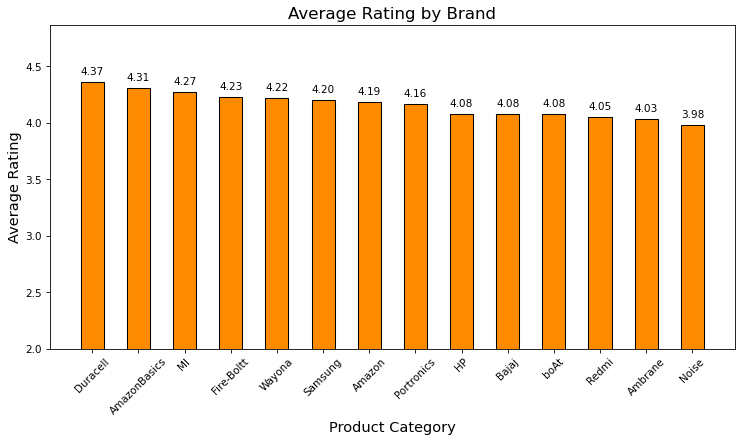

In [81]:
# Filtering out brands with fewer than 20 rows
brand_counts = products['brand'].value_counts()
valid_brands = brand_counts[brand_counts >= 20].index

# Filtering the DataFrame to include only brands with sufficient data
filtered_products = products[products['brand'].isin(valid_brands)]

# Compute the average rating for each brand and sort in descending order
average_ratings = filtered_products.groupby('brand')['rating'].mean()
average_ratings = average_ratings.sort_values(ascending=False)

# Create the bar graph
bars = plt.bar(x=average_ratings.index, height=average_ratings, width=0.5, align='center', color='DarkOrange', edgecolor='black')

# Customize the graph
plt.ylim(2.0, average_ratings.max() + 0.5)                     # Set the y-axis to start at 2.0
plt.title('Average Rating by Brand', fontsize=16)
plt.xticks(ticks=average_ratings.index, rotation=45, fontsize=10)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.tight_layout()

# Add labels to the bars
for bar, rating in zip(bars, average_ratings):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center of the bar
        bar.get_height() + 0.05,  # Slightly above the bar
        f'{rating:.2f}',  # Display the rating with 2 decimal points
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Display the graph
plt.show()

#### <span style="color:navy">Observations: Duracell and AmazonBasics (electronic accessories, home & kitchen appliances) have the highest average ratings, while Ambrane (electronic accessories) and Noise (wearable technology) have the lowest.</span>

### <center><span style="color:DarkOrange">3) What Factors Are Correlated With the Product Rating?</span></center>


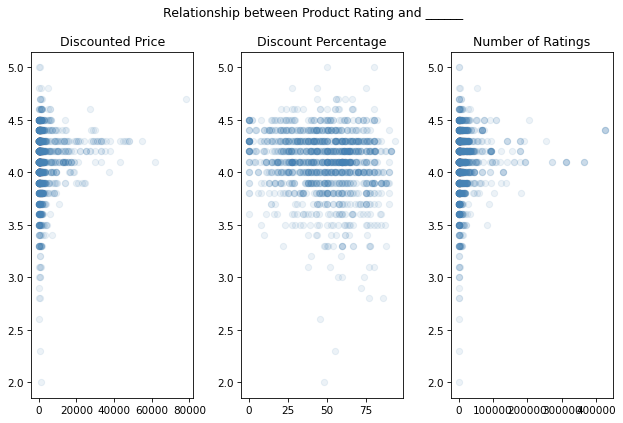

In [120]:
# Creating a subplot of 3 scatterplots to see if discounted price, discount percentage, or number of ratings are correlated with product rating.

plt.suptitle('Relationship between Product Rating and ______')

plt.subplot(1, 3, 1)
plt.scatter(x=products.discounted_price, y=products.rating, color='steelblue', alpha=0.1)
plt.title('Discounted Price')

plt.subplot(1,3,2)
plt.scatter(x=products.discount_percentage, y=products.rating, color='steelblue', alpha=0.1)
plt.title('Discount Percentage')

plt.subplot(1,3,3)
plt.scatter(x=products.rating_count, y=products.rating, color='steelblue', alpha=0.1)
plt.title('Number of Ratings')

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

#### <span style="color:navy">2) There are no discernable correlations between any of the numeric variables and product rating.</span>

### <center><span style="color:DarkOrange">4) Which Products Have High Potential for Growth?</span></center>

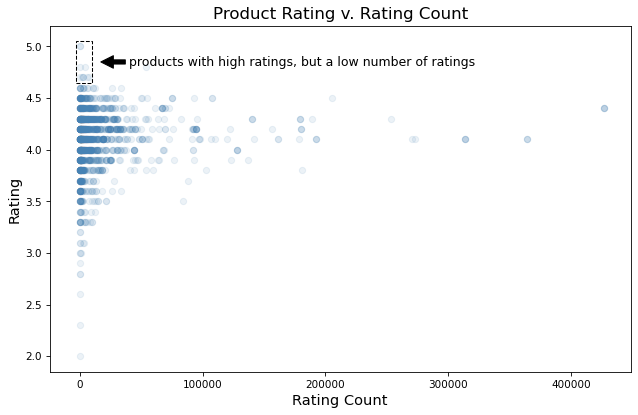

In [203]:
# Creating a scatterplot to identify the products that have high ratings, but low rating counts. These products are loved by customers and have the potential to 

import matplotlib.patches as patches

# Create the scatter plot
plt.scatter(x=products.rating_count, y=products.rating, color='steelblue', alpha=0.1)

# Create a box around high opportunity products
box = patches.Rectangle((-3000, 4.65), 13000, 0.4, linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
plt.gca().add_patch(box)

# Add an arrow and text
plt.annotate('products with high ratings, but a low number of ratings',
             xy=(16000, 4.85),  # Arrow point
             xytext=(40000, 4.85),  # Text position
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12,
             horizontalalignment='left',
             verticalalignment='center')

# Show the plot
plt.title('Product Rating v. Rating Count', fontsize=16)
plt.xlabel('Rating Count', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.show()

In [205]:
# Listing these high opportunity products that earned ratings over 4.6, but have fewer than 10,000 total ratings.

products[(products['rating_count'] < 10000) & (products['rating'] > 4.6)]['product_name']

174     Syncwire LTG to USB Cable for Fast Charging Co...
249     Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...
459     Spigen EZ Fit Tempered Glass Screen Protector ...
775     Amazon Basics Wireless Mouse | 2.4 GHz Connect...
1201    Oratech Coffee Frother electric, milk frother ...
1223    FIGMENT Handheld Milk Frother Rechargeable, 3-...
1226    Zuvexa USB Rechargeable Electric Foam Maker - ...
1275    Multifunctional 2 in 1 Electric Egg Boiling St...
1299    Instant Pot Air Fryer, Vortex 2QT, Touch Contr...
1388    Campfire Spring Chef Prolix Instant Portable W...
Name: product_name, dtype: object

#### <span style="color:navy">Observations: The 10 products listed above have a relatively low number of total ratings (<10,000), but earned ratings of over 4.6 out of 5. Because these products are well loved, but not well known, Amazon could benefit from promoting these products to customers. </span>